In [2]:
import sklearn
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
from sklearn import impute
from sklearn import pipeline
from sklearn import compose
from sklearn import model_selection
from sklearn import tree, neighbors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn import ensemble

In [3]:
dir = '../'
train_data = pd.read_csv(os.path.join(dir, 'train.csv'))
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
print(train_data.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


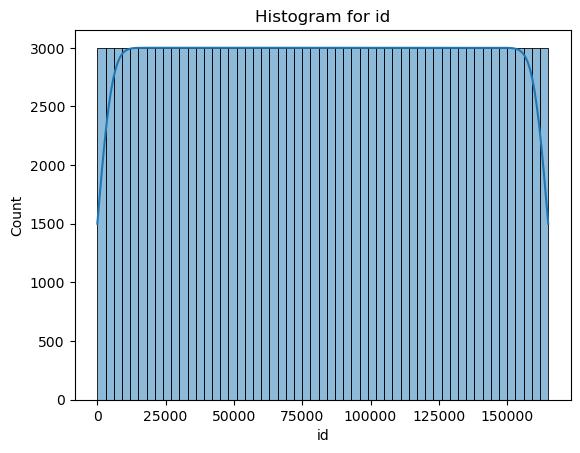

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


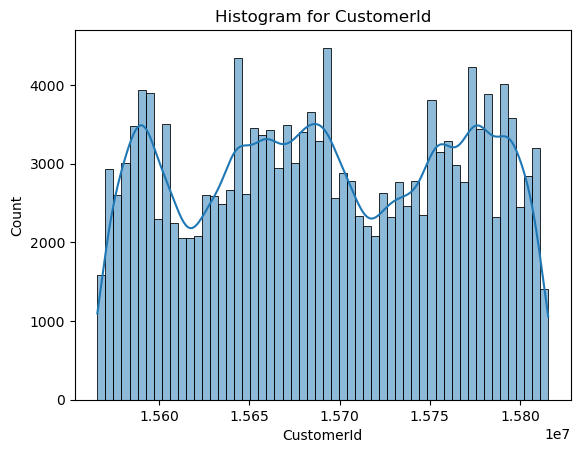

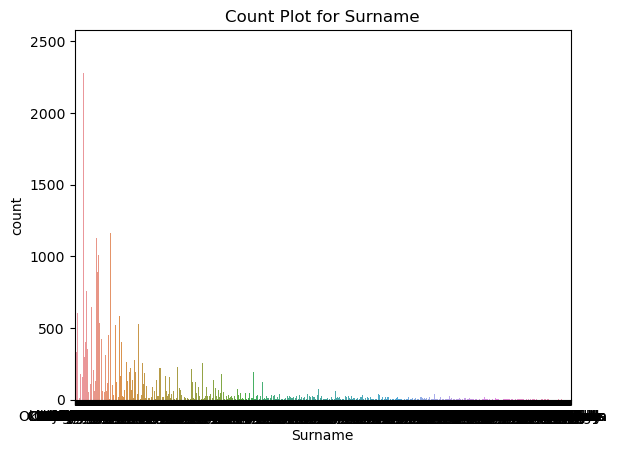

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


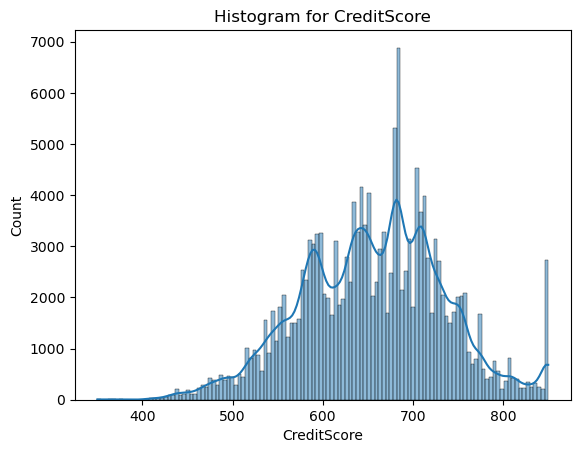

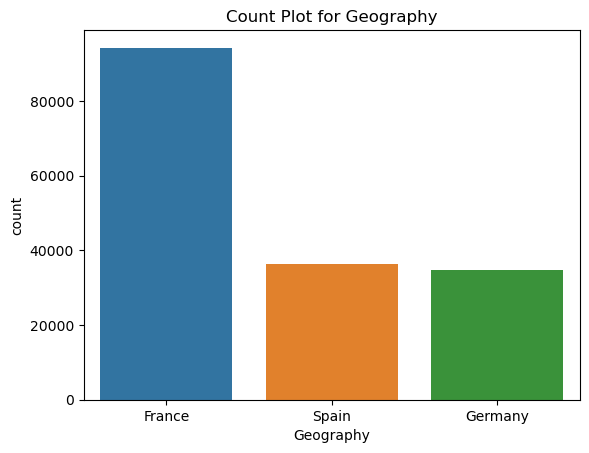

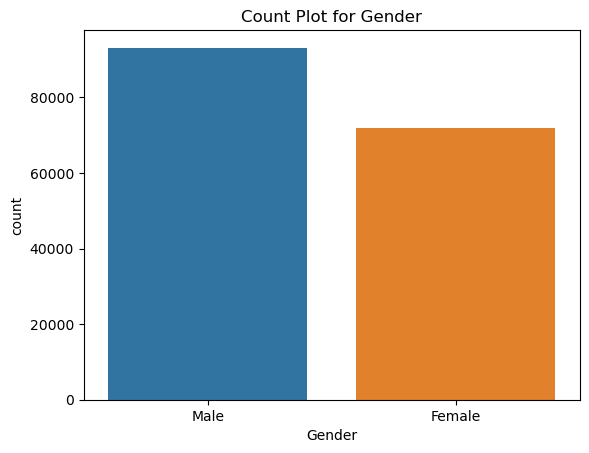

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


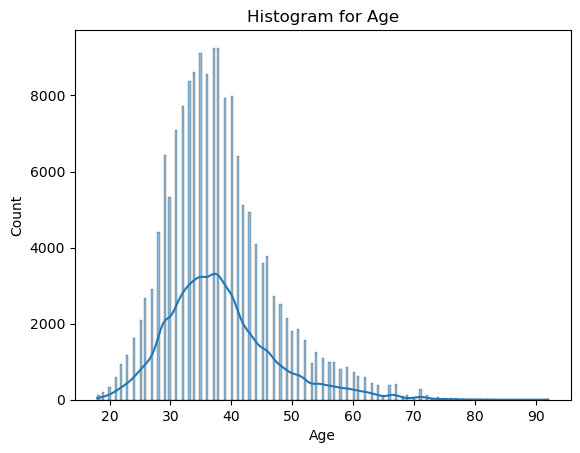

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


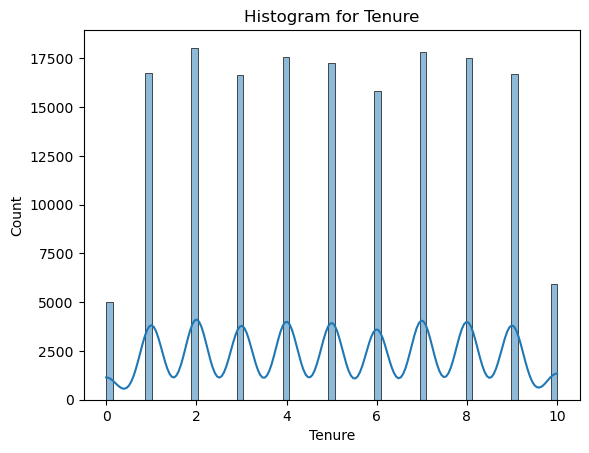

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


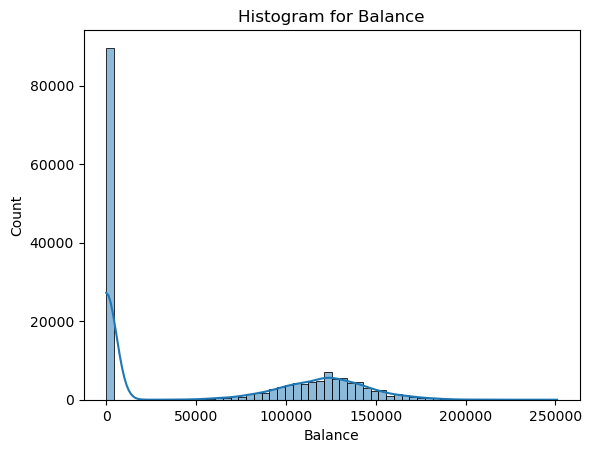

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


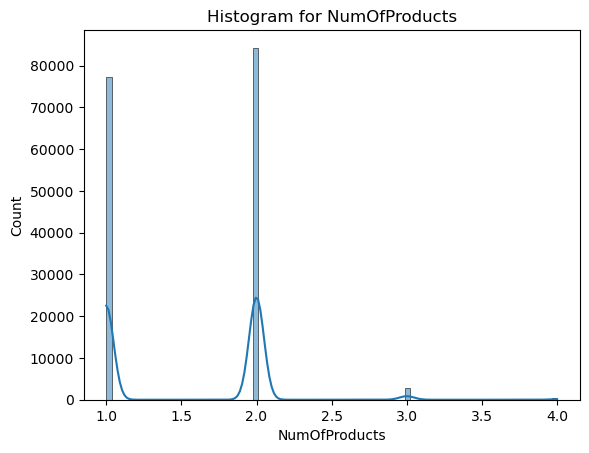

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


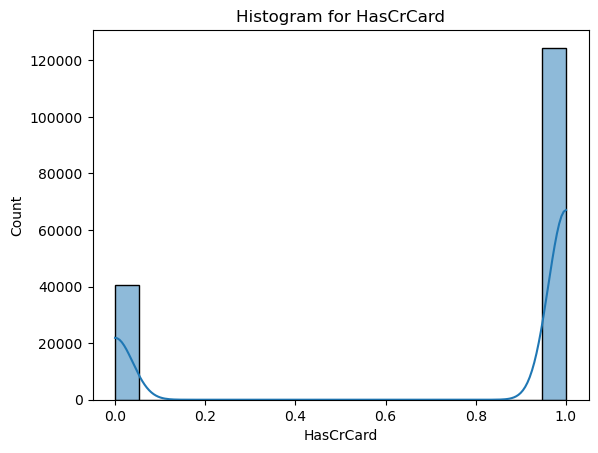

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


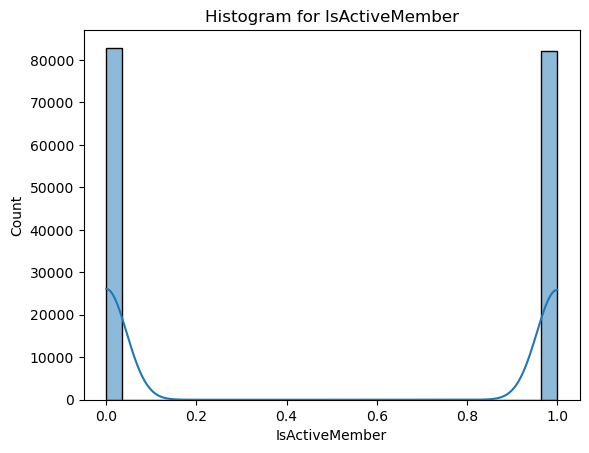

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


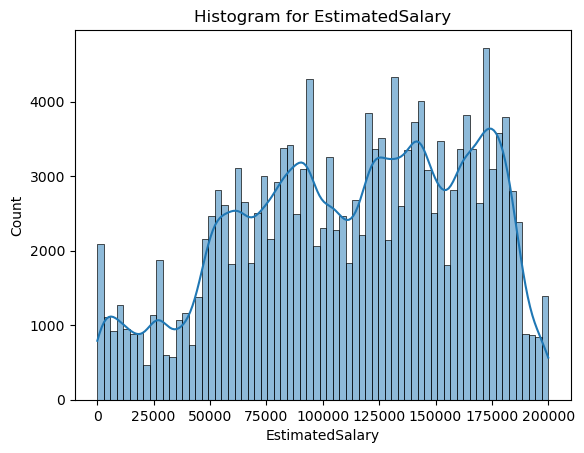

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


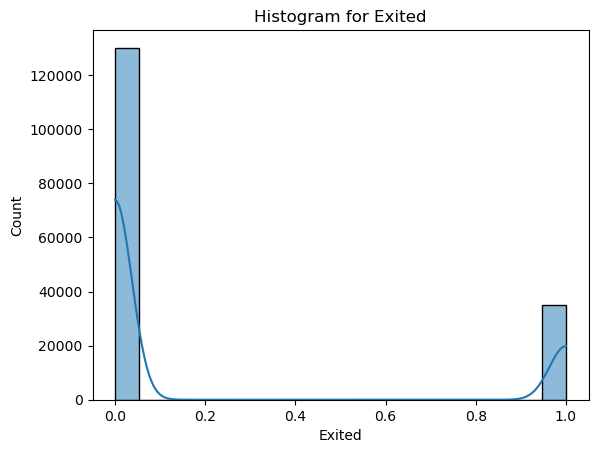

In [5]:
for column in train_data.columns:
    if train_data[column].dtype == 'object':  # Categorical data
        sns.countplot(x=train_data[column])
        plt.title(f'Count Plot for {column}')
    else:  # Numerical data
        sns.histplot(train_data[column], kde=True)
        plt.title(f'Histogram for {column}')
    plt.show()

In [6]:
train_data['Surname'].nunique()

2797

In [7]:
cont_features = ['CustomerId', 'CreditScore',
       'Age', 'Tenure', 'Balance', 'EstimatedSalary']
imp = impute.SimpleImputer()
tmp1 = imp.fit_transform(train_data[cont_features])
tmp1 = pd.DataFrame(tmp1, columns = cont_features)
tmp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  float64
 1   CreditScore      165034 non-null  float64
 2   Age              165034 non-null  float64
 3   Tenure           165034 non-null  float64
 4   Balance          165034 non-null  float64
 5   EstimatedSalary  165034 non-null  float64
dtypes: float64(6)
memory usage: 7.6 MB


In [8]:
cat_features = [ 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Surname']

ohe = preprocessing.OneHotEncoder(sparse_output=False)
tmp = ohe.fit_transform(train_data[cat_features])
tmp2 = pd.DataFrame(tmp, columns = ohe.get_feature_names_out(cat_features))
tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Columns: 2810 entries, Geography_France to Surname_Zuyeva
dtypes: float64(2810)
memory usage: 3.5 GB


In [9]:
train_data_1 = pd.concat([tmp1, tmp2], axis=1)
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Columns: 2816 entries, CustomerId to Surname_Zuyeva
dtypes: float64(2816)
memory usage: 3.5 GB


In [10]:
vt = feature_selection.VarianceThreshold()
vt.fit(train_data_1)
print(vt.variances_)
res = vt.transform(train_data_1)
print(res.shape)


[2.49989000e+05 5.00000000e+02 7.40000000e+01 ... 1.15114537e-04
 3.51319221e-04 3.63429271e-04]
(165034, 2816)


In [11]:
##### Method-1: statstical feature selection

ss = feature_selection.SelectKBest(k = 5)
ss.fit(train_data_1, train_data['Exited'])
print(train_data_1.columns)
print(ss.scores_)
res = ss.transform(train_data_1)
res = pd.DataFrame(res, columns = ss.get_feature_names_out(train_data_1.columns))
res.info()

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female',
       ...
       'Surname_Zimmer', 'Surname_Zinachukwudi', 'Surname_Zito',
       'Surname_Zotova', 'Surname_Zox', 'Surname_Zubarev', 'Surname_Zubareva',
       'Surname_Zuev', 'Surname_Zuyev', 'Surname_Zuyeva'],
      dtype='object', length=2816)
[1.63288604e+01 1.23834966e+02 2.16817498e+04 ... 3.28513591e-01
 5.46825016e-02 7.26373204e-01]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                165034 non-null  float64
 1   Geography_Germany  165034 non-null  float64
 2   NumOfProducts_1    165034 non-null  float64
 3   NumOfProducts_2    165034 non-null  float64
 4   NumOfProducts_3    165034 non-null  float64
dtypes: float64(5)
memory u

<Axes: >

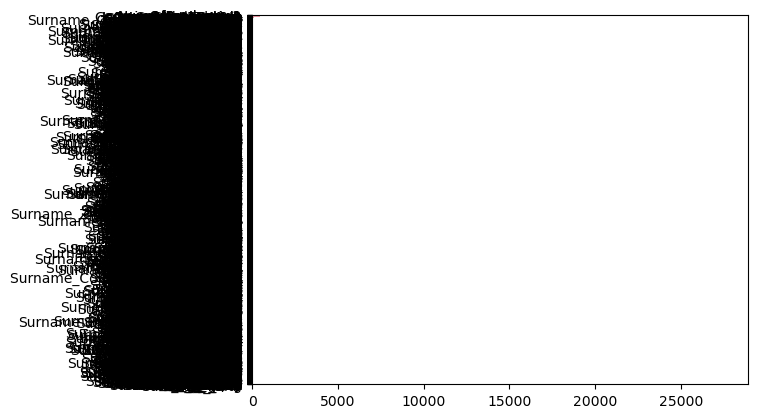

In [12]:
sort_idx = ss.scores_.argsort()[::-1]
sns.barplot(x=ss.scores_[sort_idx], y = train_data_1.columns[sort_idx])

In [13]:
rf = ensemble.RandomForestClassifier()
rf_grid  = {'max_depth':[1,5,9], 'n_estimators':[100] }
cv = model_selection.KFold(n_splits=10)
clf = model_selection.GridSearchCV(rf, rf_grid, cv=cv, scoring='accuracy',return_train_score=True)
clf.fit(train_data_1, train_data['Exited'])

embedded_selector = feature_selection.SelectFromModel(clf.best_estimator_, prefit=True, threshold=0.03)
train_data_2 = embedded_selector.fit_transform(train_data_1)
print(embedded_selector.estimator.feature_importances_)
print(embedded_selector.get_support())
print(train_data_1.columns[embedded_selector.get_support()])
print(train_data_2.shape)

[0.00986547 0.01464737 0.15932727 ... 0.         0.         0.        ]
[False False  True ... False False False]
Index(['Age', 'Balance', 'Geography_France', 'Geography_Germany',
       'Gender_Male', 'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'IsActiveMember_0.0', 'IsActiveMember_1.0'],
      dtype='object')
(165034, 10)


<Axes: >

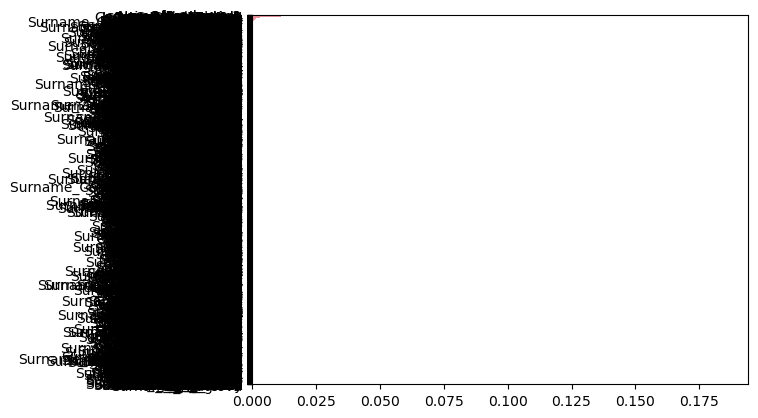

In [14]:
imp = embedded_selector.estimator.feature_importances_
sort_idx = imp.argsort()[::-1]
sns.barplot(x=imp[sort_idx], y = train_data_1.columns[sort_idx])